In [729]:
%load_ext autoreload
%autoreload 2

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook that handles data loading! 

This notebook is used to initially load and prepare data. This means loading into a datamanager, merging data (if wanted), and doing any preliminary alterations to the dataset. 

In [730]:
from data_prep import data_manager as DM

# instanciate a new datamanager 
dm = DM.Data_Manager()
# loads all data into the datamanager 
dm.data_loader()


## Removing features with null values

This mainly removes three features, these either have alot of null values or are not important for our final model, making it ok to remove either way.
This also removes the need for imputing. 

In [731]:
print("A DATA NULLS")
print (" ")
print('x_train_observed')
print(dm.X_train_observed_a.isnull().sum()[dm.X_train_observed_a.isnull().sum() > 0])
print (" ")
print('x_train_estimated')
print(dm.X_train_estimated_a.isnull().sum()[dm.X_train_estimated_a.isnull().sum() > 0])
print (" ")
print('x_test_estimated')
print(dm.X_test_estimated_a.isnull().sum()[dm.X_test_estimated_a.isnull().sum() > 0])
print (" ")
print('data_A')
print(dm.data_A.isnull().sum()[dm.data_A.isnull().sum() > 0])
print (" ")
print("B DATA NULLS")
print (" ")
print('x_train_observed')
print(dm.X_train_observed_b.isnull().sum()[dm.X_train_observed_b.isnull().sum() > 0])
print (" ")
print('x_train_estimated')
print(dm.X_train_estimated_b.isnull().sum()[dm.X_train_estimated_b.isnull().sum() > 0])
print (" ")
print('x_test_estimated')
print(dm.X_test_estimated_b.isnull().sum()[dm.X_test_estimated_b.isnull().sum() > 0])
print (" ")
print('data_B')
print(dm.data_B.isnull().sum()[dm.data_B.isnull().sum() > 0])
print (" ")
print("C DATA NULLS")
print (" ")
print('x_train_observed')
print(dm.X_train_observed_c.isnull().sum()[dm.X_train_observed_c.isnull().sum() > 0])
print (" ")
print('x_train_estimated')
print(dm.X_train_estimated_c.isnull().sum()[dm.X_train_estimated_c.isnull().sum() > 0])
print (" ")
print('x_test_estimated')
print(dm.X_test_estimated_c.isnull().sum()[dm.X_test_estimated_c.isnull().sum() > 0])
print (" ")
print('data_C')
print(dm.data_C.isnull().sum()[dm.data_C.isnull().sum() > 0])




A DATA NULLS
 
x_train_observed
ceiling_height_agl:m     22247
cloud_base_agl:m          8066
snow_density:kgm3       115945
dtype: int64
 
x_train_estimated
ceiling_height_agl:m     3919
cloud_base_agl:m         2094
snow_density:kgm3       15769
dtype: int64
 
x_test_estimated
ceiling_height_agl:m     793
cloud_base_agl:m         298
snow_density:kgm3       2880
dtype: int64
 
data_A
Series([], dtype: float64)
 
B DATA NULLS
 
x_train_observed
ceiling_height_agl:m     18772
cloud_base_agl:m          7473
snow_density:kgm3       111201
dtype: int64
 
x_train_estimated
ceiling_height_agl:m     3689
cloud_base_agl:m         1963
snow_density:kgm3       15713
dtype: int64
 
x_test_estimated
ceiling_height_agl:m     755
cloud_base_agl:m         277
snow_density:kgm3       2880
dtype: int64
 
data_B
Series([], dtype: float64)
 
C DATA NULLS
 
x_train_observed
ceiling_height_agl:m     19923
cloud_base_agl:m          8512
snow_density:kgm3       107593
dtype: int64
 
x_train_estimated
ceilin

In [732]:
dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_density:kgm3", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_density:kgm3", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_density:kgm3", axis=1) 

dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_density:kgm3", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("ceiling_height_agl:m", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("ceiling_height_agl:m", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("ceiling_height_agl:m", axis=1) 
dm.X_train_estimated_a = dm.X_train_estimated_a.drop("ceiling_height_agl:m", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("ceiling_height_agl:m", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("ceiling_height_agl:m", axis=1)

dm.X_train_observed_a = dm.X_train_observed_a.drop("cloud_base_agl:m", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("cloud_base_agl:m", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("cloud_base_agl:m", axis=1) 
dm.X_train_estimated_a = dm.X_train_estimated_a.drop("cloud_base_agl:m", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("cloud_base_agl:m", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("cloud_base_agl:m", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("cloud_base_agl:m", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("cloud_base_agl:m", axis=1) 
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("cloud_base_agl:m", axis=1) 

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("ceiling_height_agl:m", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("ceiling_height_agl:m", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("ceiling_height_agl:m", axis=1)

dm.X_test_estimated_a = dm.X_test_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_test_estimated_b = dm.X_test_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_test_estimated_c = dm.X_test_estimated_c.drop("snow_density:kgm3", axis=1)

## Now we look at sample rates

the training weather data is sampled every 15 minutes, whilst the pv_measurements are every hour. 
We can either 
1. sample down. Making weather data be every hour using the mean value of every hour 
2. sample up. Making the pv_measurement every 15 min instead of every hour. 

In [733]:
# Sample down

resamples = dm.resample_data([dm.X_train_observed_a, 
                                   dm.X_train_observed_b, 
                                   dm.X_train_observed_c, 
                                   dm.X_train_estimated_a,
                                   dm.X_train_estimated_b,
                                   dm.X_train_estimated_c,
                                   dm.X_test_estimated_a,
                                   dm.X_test_estimated_b,
                                   dm.X_test_estimated_c], "H")

dm.X_train_observed_a = resamples[0]
dm.X_train_observed_b = resamples[1] 
dm.X_train_observed_c = resamples[2] 
dm.X_train_estimated_a = resamples[3]
dm.X_train_estimated_b = resamples[4]
dm.X_train_estimated_c = resamples[5]
dm.X_test_estimated_a = resamples[6]
dm.X_test_estimated_b = resamples[7]
dm.X_test_estimated_c = resamples[8]



# Sample up

# resamples = dm.resample_data([
#                             dm.X_test_estimated_a,
#                             dm.X_test_estimated_b,
#                             dm.X_test_estimated_c], "H")


# dm.X_test_estimated_a = resamples[0]
# dm.X_test_estimated_b = resamples[1]
# dm.X_test_estimated_c = resamples[2]

# resamples = dm.resample_data([dm.train_a, dm.train_b, dm.train_c], "15T")

# train_a_15min = resamples[0]
# train_b_15min = resamples[1]
# train_c_15min = resamples[2]

# dm.train_a = resamples[0]
# dm.train_b = resamples[1]
# dm.train_c = resamples[2]


dm.train_a




,date_forecast,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


## Combining data into one training set 

In [734]:
dm.combine_data()
dm.sorting_columns_inMainSets()

print(dm.data_A.shape, dm.data_B.shape, dm.data_C.shape, dm.data.shape)

dates_A = dm.data_A["date_forecast"]
dates_B = dm.data_B["date_forecast"]
dates_C = dm.data_C["date_forecast"]

(34061, 45) (32819, 45) (26071, 45) (0, 0)


## Lag Features

In [735]:

# hours = 0
# days = 1
# placeholder = ['direct_rad:W', 'sun_azimuth:d', 'clear_sky_energy_1h:J']
# features = [placeholder[0]]
# print(features)
# lag = np.append(-1*np.arange(1, hours+1), -1*np.arange(24, 24*days+1, 24))
# for l in lag:
#     for feature in features:
#         dm.add_lag_feature(feature, l)

#dm.add_lag_feature('direct_rad:W', -23)



## Removing const y values
This is most likely due to errors in measurement device. Since it doesn't make sense to train on data with errors, we will remove the entire rows

y_train_a anomalies: 0
y_train_b anomalies: 0
y_train_c anomalies: 0
y_train_a anomalies: 0
y_train_b anomalies: 1
y_train_c anomalies: 14


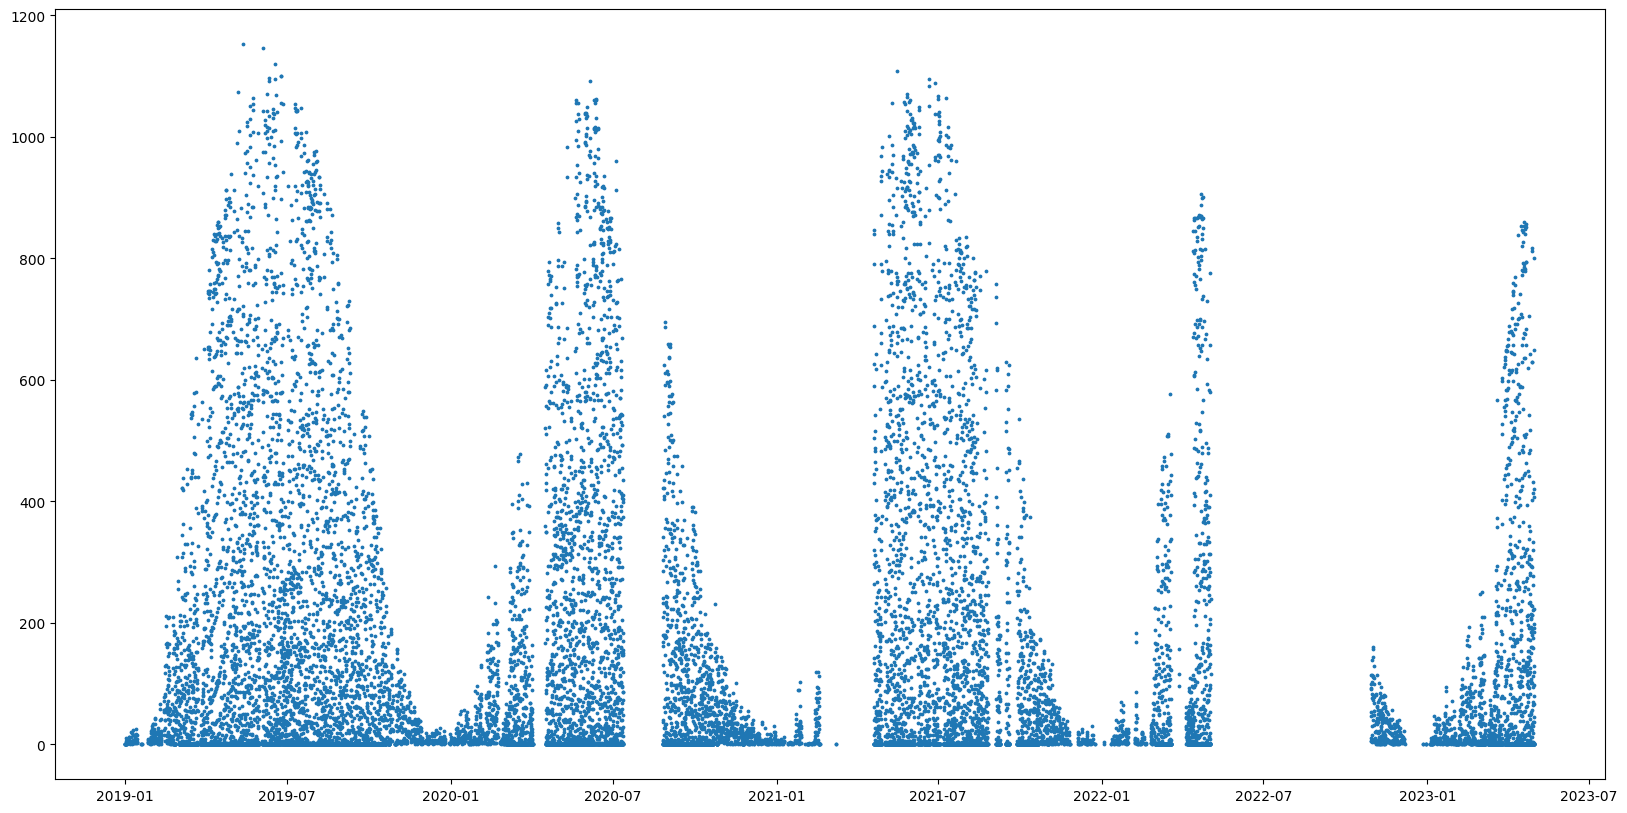

In [737]:
dm.remove_constant_periods(15)
# dm.remove_constant_periods(30) # HR FREQUENCY
# dm.remove_constant_periods(200) # 15 MIN FREQUENCY

dm.remove_constant_periods(3, [0]) # Keep this

# ----------------------------------------------------------------------------------------

#Define a flucutuation threshold that describes anything under as a 'flat' line
# threshold = 0.1
# zero_threshold = 24
# counter = 0
# val = None

# def func(row):
#     global val
#     global counter
#     global zero_threshold


    
#     if val is None:
#         val = row
#         return True
    
#     elif abs(row - val) <= threshold:
#             if val == 0.0 or val == -0.0: 
#                 counter += 1

#                 if counter>zero_threshold: 
#                     return False
#                 else:
#                     return True
            
#             else: 
#                 counter = 0 
#                 return False
#     else:
#         val = row
#         return True

# dfb = dm.data_B[dm.data_B['pv_measurement'].map(func)].reset_index(drop=True)
# dfc = dm.data_C[dm.data_C['pv_measurement'].map(func)].reset_index(drop=True)
# dfa = dm.data_A[dm.data_A['pv_measurement'].map(func)].reset_index(drop=True)

# #Check before and after plots to see difference reflected
# print(dfb.shape)
# print(dfc.shape)
# print(dfa.shape)
# dm.plot_feature(dfb, "pv_measurement")
# dm.plot_feature(dfc, "pv_measurement")
# dm.plot_feature(dfa, "pv_measurement")


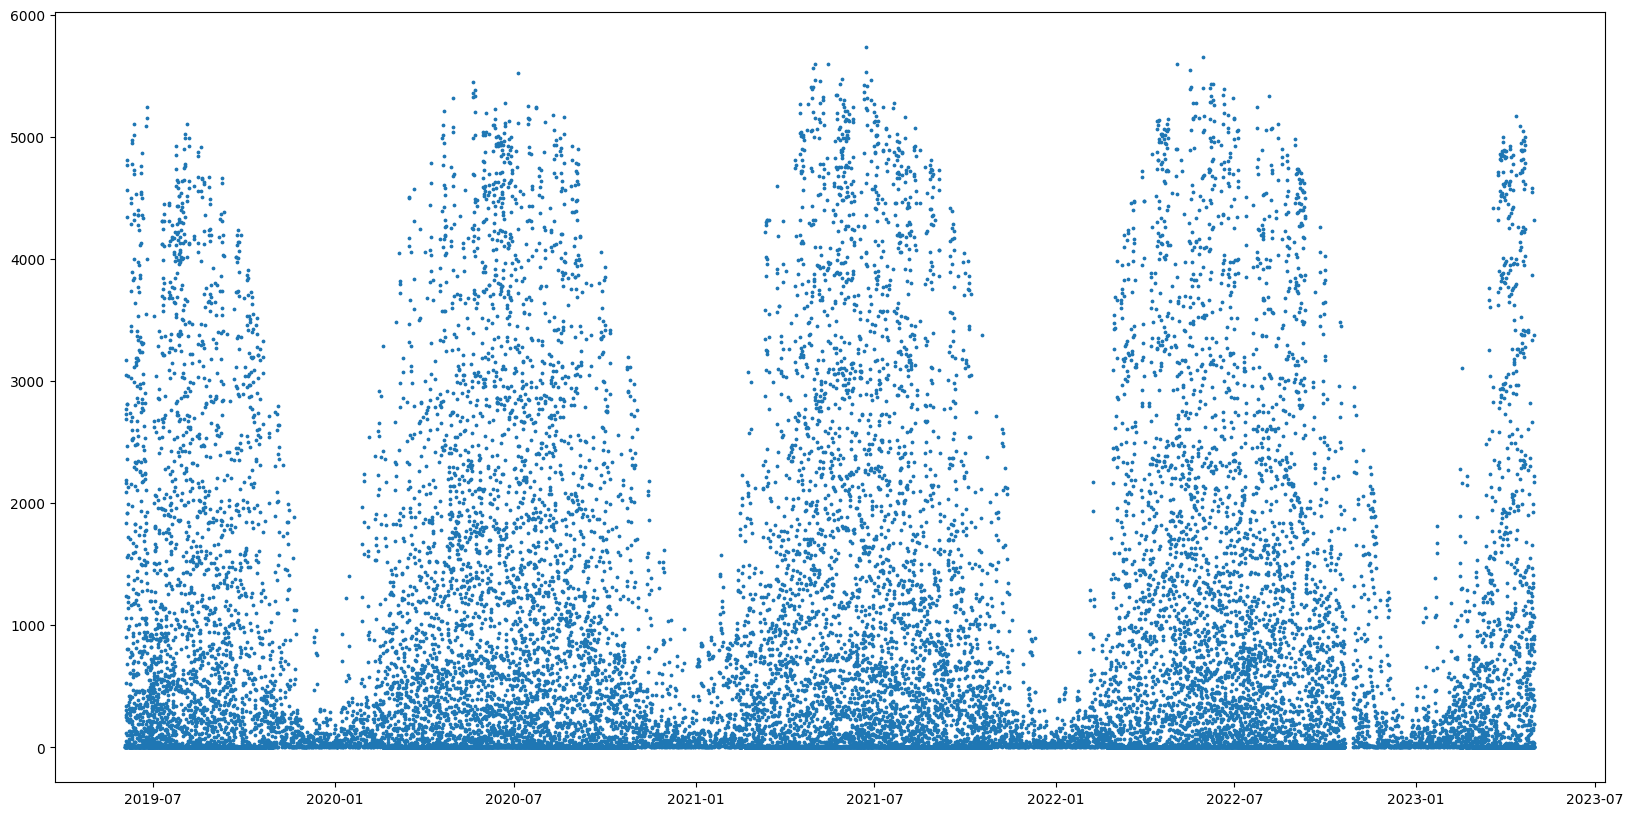

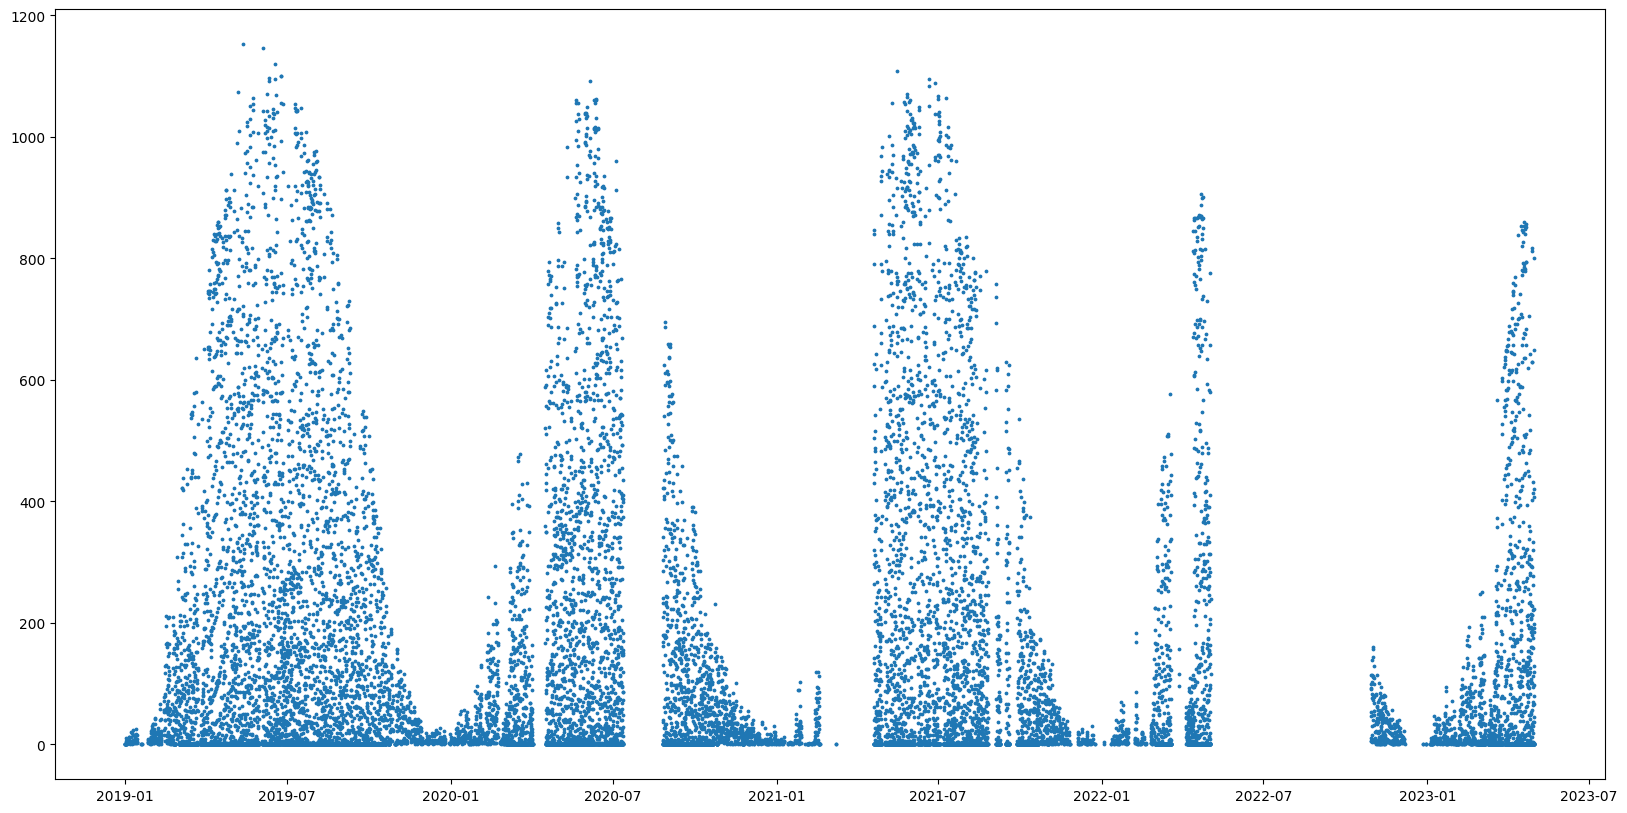

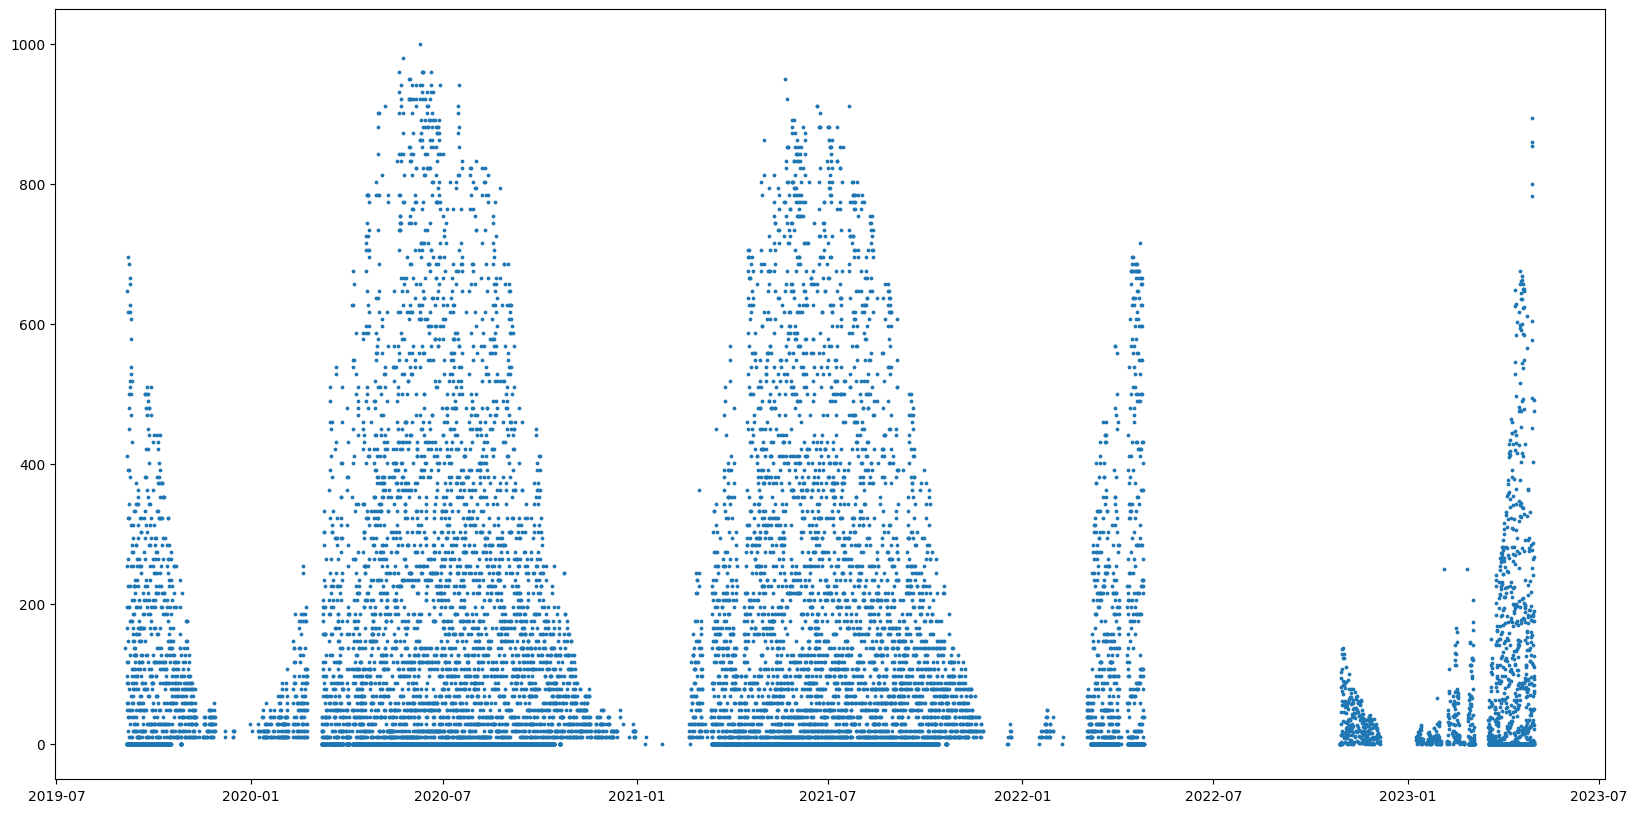

In [738]:
dm.plot_feature(dm.data_A, "pv_measurement")
dm.plot_feature(dm.data_B, "pv_measurement")
dm.plot_feature(dm.data_C, "pv_measurement")


In [721]:
# dm.data_A = dfa
# dm.data_B = dfb
# dm.data_C = dfc

## BC Donation
At this point dataset B and C has a lot of missing values. We will exploit the fact that the two training sets are quite similar and donate missing values to each other.

In [722]:
from helpers import donate_missing_rows

updated_b, count_b = donate_missing_rows(dm.data_B, dm.data_C)
print('donated rows from C to B: ', count_b)
# updated_c, count_c = donate_missing_rows(dm.data_C, dm.data_B)
# print('donated rows from B to C: ', count_c)

donated rows from C to B:  7795


In [723]:
# # set donated data
dm.data_B = updated_b
# dm.data_C = updated_c

(17914, 45)
(14966, 45)


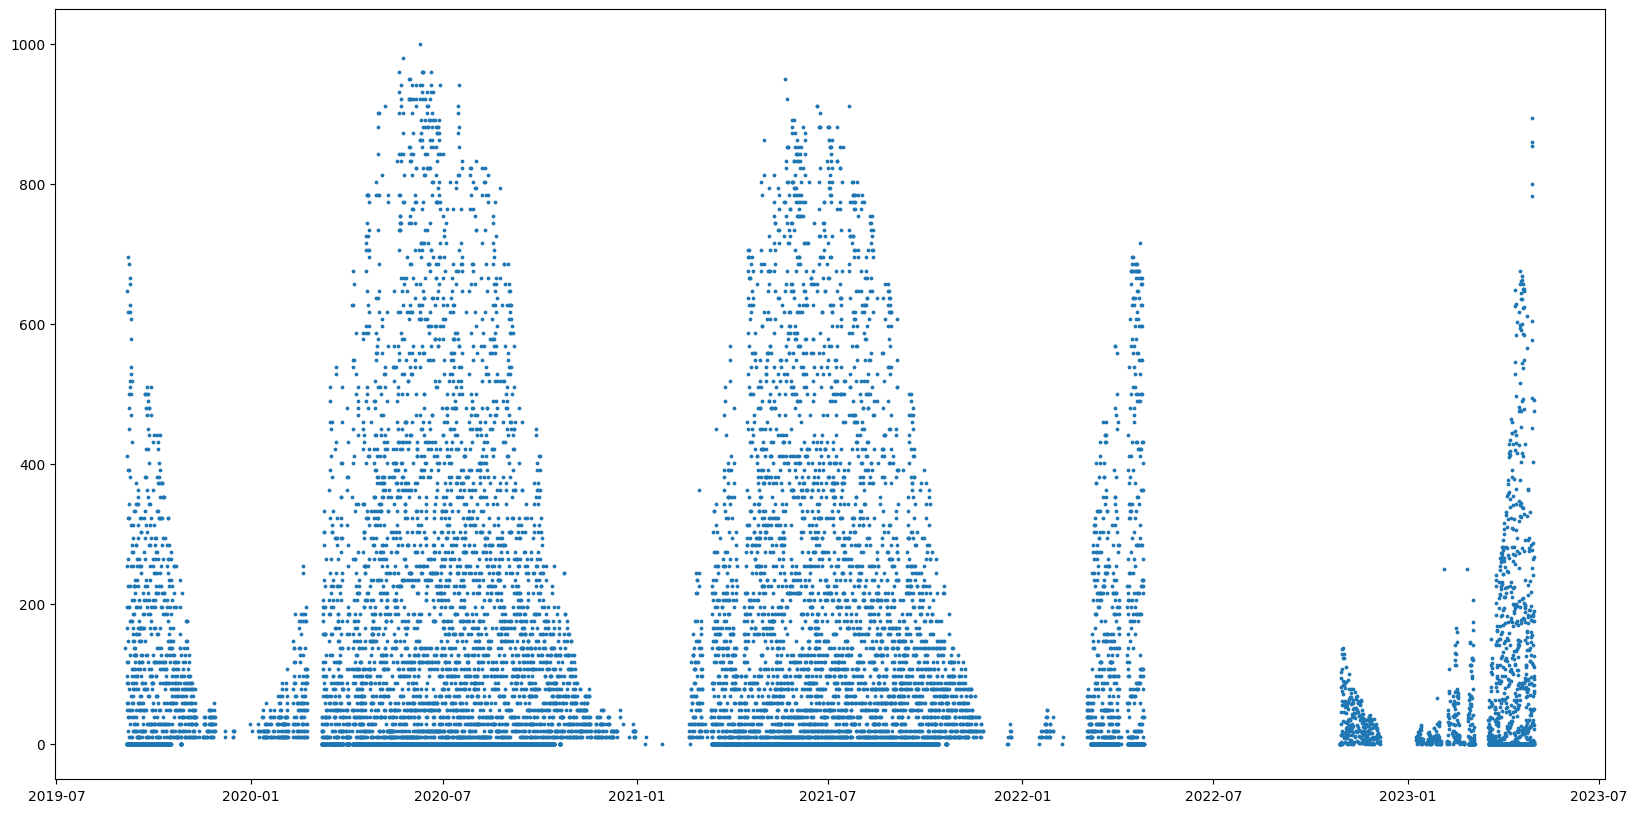

In [739]:
dm.plot_feature(dm.data_C, "pv_measurement")

print(dm.data_B.shape)
print(dm.data_C.shape)

### Saving data

In [673]:
%store dm

Stored 'dm' (Data_Manager)
